In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


# 1. Obtain Data

### 1.1. Obtain Population Data 

In [2]:
population = pd.read_excel(r'C:\Users\Marta Castiella\Downloads\Population.xlsx')
df_p=population[['Metropolitan Area','Population in Millions']]
df_p.rename(columns={'Metropolitan Area':'City','Population in Millions':'Population'},inplace=True)
df_p['Population'] = df_p['Population'].str.strip()
df_p['Population']=pd.to_numeric(df_p['Population'])
df_p['Population']

C:\Users\Marta Castiella\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Marta Castiella\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Marta Castiella\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

0     12.788
1     12.346
2      6.792
3      5.208
4      5.146
       ...  
59     1.040
60     1.027
61     1.026
62     1.017
63     1.007
Name: Population, Length: 64, dtype: float64

### 1.2. Obtain Flights Data

In [3]:
flighs_html = requests.get("https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_Europe").text
df_f = pd.read_html(flighs_html)
df_f=df_f[0]
df_f

Rank2019 Rankchange2018-2019         Country  \
   Rank2019 Rankchange2018-2019         Country   
0         1                 NaN  United Kingdom   
1         2                 NaN          France   
2         3                 NaN     Netherlands   
3         4                 NaN         Germany   
4         5                   1           Spain   
..      ...                 ...             ...   
95       96                   2           Italy   
96       97                   5  United Kingdom   
97       98                   2          Russia   
98       99                 New      Luxembourg   
99      100                   3          Norway   

                                    Airport                 City served  \
                                    Airport                 City served   
0                          Heathrow Airport                      London   
1                 Charles de Gaulle Airport                       Paris   
2                Amsterdam Airport Schiphol                   Amsterdam   
3                 Frankfurt am Main Airport                   Frankfurt   
4      Adolfo Suárez Madrid–Barajas Airport                      Madrid   
..                                      ...                         ...   
95                   Cagliari Elmas Airport                    Cagliari   
96                    East Midlands Airport  Derby/Leicester/Nottingham   
97  Krasnodar International Airport[Note 2]                   Krasnodar   
98                       Luxembourg Airport             Luxembourg City   
99                 Trondheim Airport Værnes                   Trondheim   

                    Passengers                             Change 2018-2019  \
                          2019                        2018                %   
0                80,886,589[1]               80,100,311[1]             1.0%   
1                76,150,007[2]               72,229,723[3]             5.4%   
2                71,707,144[4]               71,053,157[4]             0.9%   
3                70,556,072[5]               69,510,269[6]             1.5%   
4                61,734,037[7]               57,891,340[7]             6.6%   
..                         ...                         ...              ...   
95               4,747,806[11]               4,370,014[11]             8.6%   
96                4,674,338[1]                4,873,757[1]             4.1%   
97                4,630,770[9]                4,160,053[9]            11.3%   
98  4,416,038[citation needed]  4,036,878[citation needed]             9.4%   
99               4,381,921[20]               4,441,791[20]             1.3%   

             
    Numbers  
0    786278  
1   3920284  
2    653987  
3   1045803  
4   3842697  
..      ...  
95   377792  
96   199237  
97   483699  
98   379160  
99    59870  

[100 rows x 9 columns]

In [4]:
d = {'City':df_f.iloc[:,4],'Passengers':df_f.iloc[:,5]}
df_f=pd.DataFrame(d)
df_f

,City,Passengers
0,London,"80,886,589[1]"
1,Paris,"76,150,007[2]"
2,Amsterdam,"71,707,144[4]"
3,Frankfurt,"70,556,072[5]"
4,Madrid,"61,734,037[7]"
...,...,...
95,Cagliari,"4,747,806[11]"
96,Derby/Leicester/Nottingham,"4,674,338[1]"
97,Krasnodar,"4,630,770[9]"
98,Luxembourg City,"4,416,038[citation needed]"


In [5]:
df_f.replace('[','/',inplace=True)
to_replace = '\[\d+\]'
df_f.replace(to_replace, '', regex=True, inplace=True)
df_f.replace('\[citation needed]', '', regex=True, inplace=True)
df_f.replace(',', '', regex=True, inplace=True)
df_f.head(10)

,City,Passengers
0,London,80886589
1,Paris,76150007
2,Amsterdam,71707144
3,Frankfurt,70556072
4,Madrid,61734037
5,Barcelona,52686314
6,Istanbul,52578008
7,Moscow,49438545
8,Munich,47941348
9,London,46574786


In [6]:
df_f['Passengers']=pd.to_numeric(df_f['Passengers'])
df_f=df_f.groupby('City').sum()


In [7]:
df_f=df_f.sort_values('Passengers',ascending=False)
df_f.head(50)

,Passengers
City,
London,178921607
Paris,108003056
Moscow,101692403
Amsterdam,71707144
Frankfurt,70556072
Istanbul,68650542
Madrid,61734037
Barcelona,52686314
Rome,49412069


### 1.3. Merge 

In [8]:
df = pd.merge(df_p,df_f,on='City')


In [9]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(43, 3)
(43, 3)


In [10]:
df

,City,Population,Passengers
0,Paris,12.788,108003056
1,London,12.346,178921607
2,Madrid,6.792,61734037
3,Berlin,5.208,35645005
4,Milan,5.146,35417283
5,Barcelona,4.991,52686314
6,Rome,4.429,49412069
7,Athens,3.828,25574030
8,Naples,3.407,10860068
9,Manchester,3.330,29367477


In [11]:
df.drop(39,inplace=True)
df.reset_index(inplace=True)
df

,index,City,Population,Passengers
0,0,Paris,12.788,108003056
1,1,London,12.346,178921607
2,2,Madrid,6.792,61734037
3,3,Berlin,5.208,35645005
4,4,Milan,5.146,35417283
5,5,Barcelona,4.991,52686314
6,6,Rome,4.429,49412069
7,7,Athens,3.828,25574030
8,8,Naples,3.407,10860068
9,9,Manchester,3.330,29367477


### 1.4. Obtain Number of Venues 

In [12]:
CLIENT_ID = 'BMO2PU1OHVWGYCD4V3JI2RQPHG5AULYGRMFUGCY5VN2QASHN' # your Foursquare ID
CLIENT_SECRET = 'EATBSQ0WLLYB1NZ0RIRJPS2YWQBLLQMPS0NJSOS0ZGE3KO1U' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [15]:
city_list=[]
a=[-0.01, 0,0.01]
geolocator = Nominatim(user_agent="ny_explorer")
for name, population, passengers in zip(df['City'],df['Population'],df['Passengers']):
    
        print(name)
         
        location = geolocator.geocode(name)
        lat = location.latitude
        lng = location.longitude
        radius=500
        limit=100
        b=[name, lat, lng, population, passengers]
        queries=['restaurant','coffee','monument','bar','museum','hotel']
        for query in queries:

            total=0
            
            for i in a:
                for j in a:
        
                    try:
                        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
                        CLIENT_ID, CLIENT_SECRET, VERSION, lat+i, lng+j,radius,limit,query)
                        results = requests.get(url).json()["response"]['groups'][0]['items']
                        total=total+len(results)
                    except:
                        print('problem')
                        total=total+0
            b.append(total)  
        city_list.append(b)       
       

Paris
London
Madrid
Berlin
Milan
Barcelona
Rome
Athens
Naples
Manchester
Hamburg
Warsaw
Lisbon
Budapest
Munich
Amsterdam
Stuttgart
Frankfurt
Brussels
Katowice
Bucharest
problem
Vienna
Stockholm
Prague
Lyon
Glasgow
Dublin
Marseille
Valencia
Sofia
Düsseldorf
Liverpool
Helsinki
Kraków
Toulouse
Zürich
Oslo
Porto
Bordeaux
Bilbao
Palermo
Nice


In [23]:
df_a=pd.DataFrame(city_list)
df_a.columns = ['City','Latitude','Longitude','Population','Passengers','Restaurant','Coffee','Monument','Bar','Museum','Hotel']

In [16]:
df_a

,City,Latitude,Longitude,Population,Passengers,Restaurant,Coffee,Monument,Bar,Museum,Hotel
0,Paris,48.856697,2.351462,12.788,108003056,772,335,25,544,47,366
1,London,51.507322,-0.127647,12.346,178921607,609,419,48,518,34,229
2,Madrid,40.416705,-3.703582,6.792,61734037,517,282,73,508,51,270
3,Berlin,52.517037,13.388860,5.208,35645005,380,230,36,185,61,146
4,Milan,45.466800,9.190500,5.146,35417283,701,335,45,347,43,139
5,Barcelona,41.382894,2.177432,4.991,52686314,637,269,45,508,54,465
6,Rome,41.893320,12.482932,4.429,49412069,498,215,79,283,55,420
7,Athens,37.983941,23.728305,3.828,25574030,571,426,23,322,36,185
8,Naples,40.835934,14.248783,3.407,10860068,187,77,7,67,19,53
9,Manchester,53.479489,-2.245115,3.330,29367477,288,170,4,260,14,88


### 1.5. Normalyze Data

In [177]:
df_c = df_a.copy()
df_c['Population']=df_c['Population']/df_c['Population'].max()
df_c['Passengers']=df_c['Passengers']/df_c['Passengers'].max()
df_c['Restaurant']=df_c['Restaurant']/(df_c['Restaurant'].max()*6)
df_c['Coffee']=df_c['Coffee']/(df_c['Coffee'].max()*6)
df_c['Monument']=df_c['Monument']/(df_c['Monument'].max()*6)
df_c['Bar']=df_c['Bar']/(df_c['Bar'].max()*6)
df_c['Museum']=df_c['Museum']/(df_c['Museum'].max()*6)
df_c['Hotel']=df_c['Hotel']/(df_c['Hotel'].max()*6)
df_c

,City,Latitude,Longitude,Population,Passengers,Restaurant,Coffee,Monument,Bar,Museum,Hotel
0,Paris,48.856697,2.351462,1.000000,0.603633,0.166667,0.131064,0.052743,0.166667,0.105856,0.131183
1,London,51.507322,-0.127647,0.965436,1.000000,0.131477,0.163928,0.101266,0.158701,0.076577,0.082079
2,Madrid,40.416705,-3.703582,0.531123,0.345034,0.111615,0.110329,0.154008,0.155637,0.114865,0.096774
3,Berlin,52.517037,13.388860,0.407257,0.199221,0.082038,0.089984,0.075949,0.056679,0.137387,0.052330
4,Milan,45.466800,9.190500,0.402409,0.197949,0.151339,0.131064,0.094937,0.106311,0.096847,0.049821
5,Barcelona,41.382894,2.177432,0.390288,0.294466,0.137522,0.105243,0.094937,0.155637,0.121622,0.166667
6,Rome,41.893320,12.482932,0.346340,0.276166,0.107513,0.084116,0.166667,0.086703,0.123874,0.150538
7,Athens,37.983941,23.728305,0.299343,0.142934,0.123273,0.166667,0.048523,0.098652,0.081081,0.066308
8,Naples,40.835934,14.248783,0.266422,0.060697,0.040371,0.030125,0.014768,0.020527,0.042793,0.018996
9,Manchester,53.479489,-2.245115,0.260400,0.164136,0.062176,0.066510,0.008439,0.079657,0.031532,0.031541


# 2. Represent  

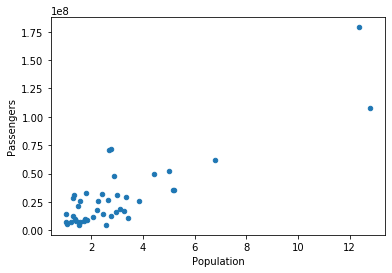

In [29]:
df_a.plot.scatter(x='Population',y='Passengers')

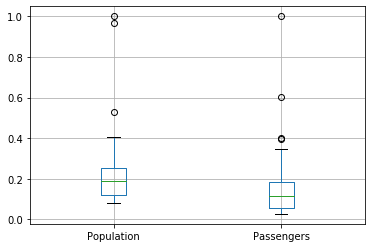

In [37]:
df_c.boxplot(column=['Population','Passengers'])

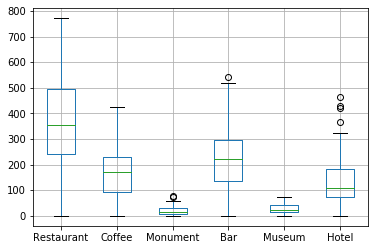

In [34]:
df_a.boxplot(column=['Restaurant','Coffee','Monument','Bar','Museum','Hotel'])

# 3. Cluster

In [175]:
# set number of clusters
kclusters = 3

df_clustering = df_c.drop(['City','Longitude','Latitude'], 1)
df_clustering
                          
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_clustering)

In [178]:
df_c.insert(0, 'Cluster Labels', kmeans.labels_)
df_c

,Cluster Labels,City,Latitude,Longitude,Population,Passengers,Restaurant,Coffee,Monument,Bar,Museum,Hotel
0,2,Paris,48.856697,2.351462,1.000000,0.603633,0.166667,0.131064,0.052743,0.166667,0.105856,0.131183
1,2,London,51.507322,-0.127647,0.965436,1.000000,0.131477,0.163928,0.101266,0.158701,0.076577,0.082079
2,1,Madrid,40.416705,-3.703582,0.531123,0.345034,0.111615,0.110329,0.154008,0.155637,0.114865,0.096774
3,1,Berlin,52.517037,13.388860,0.407257,0.199221,0.082038,0.089984,0.075949,0.056679,0.137387,0.052330
4,1,Milan,45.466800,9.190500,0.402409,0.197949,0.151339,0.131064,0.094937,0.106311,0.096847,0.049821
5,1,Barcelona,41.382894,2.177432,0.390288,0.294466,0.137522,0.105243,0.094937,0.155637,0.121622,0.166667
6,1,Rome,41.893320,12.482932,0.346340,0.276166,0.107513,0.084116,0.166667,0.086703,0.123874,0.150538
7,1,Athens,37.983941,23.728305,0.299343,0.142934,0.123273,0.166667,0.048523,0.098652,0.081081,0.066308
8,0,Naples,40.835934,14.248783,0.266422,0.060697,0.040371,0.030125,0.014768,0.020527,0.042793,0.018996
9,0,Manchester,53.479489,-2.245115,0.260400,0.164136,0.062176,0.066510,0.008439,0.079657,0.031532,0.031541


In [182]:
df_g =df_c.copy()
df_g[['Restaurant','Coffee','Monument','Bar','Museum','Hotel']]=df_g[['Restaurant','Coffee','Monument','Bar','Museum','Hotel']]*6
df_g

,Cluster Labels,City,Latitude,Longitude,Population,Passengers,Restaurant,Coffee,Monument,Bar,Museum,Hotel
0,2,Paris,48.856697,2.351462,1.000000,0.603633,1.000000,0.786385,0.316456,1.000000,0.635135,0.787097
1,2,London,51.507322,-0.127647,0.965436,1.000000,0.788860,0.983568,0.607595,0.952206,0.459459,0.492473
2,1,Madrid,40.416705,-3.703582,0.531123,0.345034,0.669689,0.661972,0.924051,0.933824,0.689189,0.580645
3,1,Berlin,52.517037,13.388860,0.407257,0.199221,0.492228,0.539906,0.455696,0.340074,0.824324,0.313978
4,1,Milan,45.466800,9.190500,0.402409,0.197949,0.908031,0.786385,0.569620,0.637868,0.581081,0.298925
5,1,Barcelona,41.382894,2.177432,0.390288,0.294466,0.825130,0.631455,0.569620,0.933824,0.729730,1.000000
6,1,Rome,41.893320,12.482932,0.346340,0.276166,0.645078,0.504695,1.000000,0.520221,0.743243,0.903226
7,1,Athens,37.983941,23.728305,0.299343,0.142934,0.739637,1.000000,0.291139,0.591912,0.486486,0.397849
8,0,Naples,40.835934,14.248783,0.266422,0.060697,0.242228,0.180751,0.088608,0.123162,0.256757,0.113978
9,0,Manchester,53.479489,-2.245115,0.260400,0.164136,0.373057,0.399061,0.050633,0.477941,0.189189,0.189247


# 4. Explore Clusters

### 4.1. Explore Features 

In [183]:
df_g=df_g.groupby('Cluster Labels')
df_g.mean().drop(['Latitude','Longitude'],axis=1)

,Population,Passengers,Restaurant,Coffee,Monument,Bar,Museum,Hotel
Cluster Labels,,,,,,,,
0,0.157920,0.092941,0.399758,0.335529,0.192323,0.340192,0.308195,0.244953
1,0.336392,0.279870,0.659902,0.638758,0.566807,0.607230,0.665165,0.517802
2,0.982718,0.801817,0.894430,0.884977,0.462025,0.976103,0.547297,0.639785


0    AxesSubplot(0.1,0.679412;0.8x0.220588)
1    AxesSubplot(0.1,0.414706;0.8x0.220588)
2        AxesSubplot(0.1,0.15;0.8x0.220588)
dtype: object

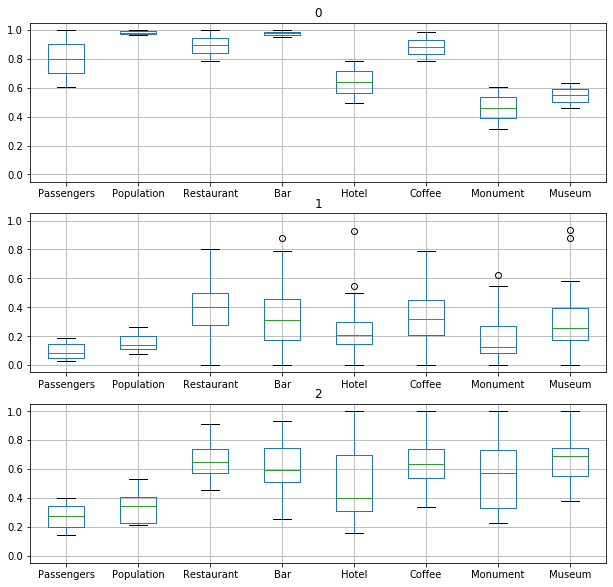

In [168]:
df_g.boxplot(column=['Passengers','Population','Restaurant','Bar','Hotel','Coffee','Monument','Museum'],layout=[3,1],figsize=[10,10])

### 4.2. Map

In [88]:
latitude=df_c.loc[3,'Latitude']
longitude=df_c.loc[3,'Longitude']

In [171]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors=['yellow','orange','red']

# add markers to the map
markers_colors = []
for lat, lon, poi,cluster in zip(df_c['Latitude'], df_c['Longitude'], df_c['City'],df_c['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colors[cluster-1],
        fill=True,
        fill_color=colors[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters